In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

#nhd_file = '../data/NHD_H_1705_HU4_GPKG.gpkg' # Middle Snake (inc. Boise)
nhd_file = '../data/NHD_H_1704_HU4_GPKG.gpkg' # Upper Snake

ws_file = '../data/hfork_ws/hfork_geometry.shp'

order = 5

In [21]:
gpd.list_layers(nhd_file)

/Users/lejoflores/GEOS-505-Fall2025/env/lib/python3.12/site-packages/pyogrio/core.py:130: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_list_layers(get_vsi_path_or_buffer(path_or_buffer))


,name,geometry_type
0,NHDArea,MultiPolygon Z
1,NHDAreaEventFC,MultiPolygon
2,NHDFlowline,MultiLineString Z
3,NHDLine,MultiLineString Z
4,NHDLineEventFC,MultiLineString
5,NHDPoint,Point Z
6,NHDPointEventFC,Point
7,NHDWaterbody,MultiPolygon Z
8,WBDHU10,MultiPolygon
9,WBDHU12,MultiPolygon


In [5]:
nhd_gdf = gpd.read_file(nhd_file, layer='NHDFlowline')
nhd_gdf

/Users/lejoflores/GEOS-505-Fall2025/env/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(


,permanent_identifier,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_permanent_identifier,ftype,...,visibilityfilter,SHAPE_Length,Enabled,resolution_description,flowdir_description,mainpath_description,innetwork_description,visibilityfilter_description,fcode_description,geometry
0,131371650,2012-02-21 21:58:09+00:00,2,01128885,West Little Owyhee River,0.631,17050107000199,1,None,460,...,5000000,0.006329,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:5,000,000 or Larger Scale",Stream/River: Hydrographic Category = Perennial,"MULTILINESTRING Z ((-117.33679 42.11858 0, -11..."
1,131371481,2012-02-21 21:59:28+00:00,2,01128885,West Little Owyhee River,0.922,17050107000171,1,None,460,...,5000000,0.009306,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:5,000,000 or Larger Scale",Stream/River: Hydrographic Category = Perennial,"MULTILINESTRING Z ((-117.22919 42.37559 0, -11..."
2,131362970,2012-02-21 22:00:14+00:00,2,None,None,3.085,17050107001900,1,None,460,...,100000,0.034796,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:100,000 or Larger Scale",Stream/River: Hydrographic Category = Intermit...,"MULTILINESTRING Z ((-117.34937 42.47935 0, -11..."
3,131369519,2012-02-21 22:00:14+00:00,2,01125528,Pole Creek,0.328,17050107004176,1,None,460,...,100000,0.003850,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:100,000 or Larger Scale",Stream/River: Hydrographic Category = Intermit...,"MULTILINESTRING Z ((-117.39968 42.14511 0, -11..."
4,131368883,2012-02-21 22:00:14+00:00,2,None,None,1.857,17050107003953,1,None,460,...,50000,0.020510,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:50,000 or Larger Scale",Stream/River: Hydrographic Category = Intermit...,"MULTILINESTRING Z ((-117.3893 42.17981 0, -117..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178761,131362913,2012-02-21 22:00:14+00:00,2,None,None,0.719,17050107001881,1,None,460,...,50000,0.007042,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:50,000 or Larger Scale",Stream/River: Hydrographic Category = Intermit...,"MULTILINESTRING Z ((-117.22941 42.58782 0, -11..."
178762,131361243,2012-02-21 21:57:33+00:00,2,01125528,Pole Creek,1.796,17050107001365,1,None,460,...,500000,0.019701,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:500,000 or Larger Scale",Stream/River: Hydrographic Category = Intermit...,"MULTILINESTRING Z ((-117.36951 42.16781 0, -11..."
178763,165179119,2012-02-21 22:00:14+00:00,2,None,None,1.047,17050107002297,1,None,460,...,50000,0.010254,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:50,000 or Larger Scale",Stream/River: Hydrographic Category = Intermit...,"MULTILINESTRING Z ((-117.10803 42.59166 0, -11..."
178764,165179122,2012-02-21 21:58:44+00:00,2,None,None,1.275,17050107000917,1,None,460,...,100000,0.015242,1,High,WithDigitized,Unspecified,Yes,"Approximately 1:100,000 or Larger Scale",Stream/River: Hydrographic Category = Intermit...,"MULTILINESTRING Z ((-117.10392 42.58347 0, -11..."


In [12]:
gpd.list_layers(ws_file)

,name,geometry_type
0,hfork_geometry,Polygon


In [14]:
ws_gdf = gpd.read_file(ws_file)
ws_gdf

,sourcedata,areaacres,sourcefeat,shape_leng,states,sourceorig,shape_area,huc8,areasqkm,name,tnmid,metasource,loaddate,gnis_id,geometry
0,None,1094937.85,None,5.13658412348482,WY,None,0.497002089785367,17040101,4431.06,Snake Headwaters,{90DC8792-B2F0-40F2-8683-7694DD4F3266},None,20161018094234,None,"POLYGON ((-110.87935 43.86176, -110.87914 43.8..."
1,None,360348.06,None,3.1171632833957,ID,None,0.162814989175519,17040201,1458.28,Idaho Falls,{69BBDDAC-64E1-47B0-9D05-D996D4AA3E99},None,20130118135515,None,"POLYGON ((-112.39898 43.61964, -112.39886 43.6..."
2,None,399656.62,None,3.45951128838346,WY,None,0.180102410279479,17040102,1617.35,Gros Ventre,{AD73DC2C-3310-4E5D-852C-3F7D7DBE9F45},None,20130118135515,None,"POLYGON ((-110.79884 43.54528, -110.7978 43.54..."
3,None,720407.17,None,5.5028421161583,"ID,WY",None,0.327613366598885,17040203,2915.39,Lower Henrys,{52B1E79B-CAEA-4259-9685-85B8F474DCE5},None,20130118135515,None,"POLYGON ((-111.99276 43.87091, -111.99272 43.8..."
4,None,713125.07,None,3.61406750067146,"ID,WY",None,0.322704103507172,17040204,2885.92,Teton,{7EF75464-E3F0-4548-896B-56E2DFFEBBE4},None,20130118135515,None,"POLYGON ((-111.88442 43.84418, -111.88442 43.8..."
5,None,1012366.97,None,4.97826530946376,"ID,WY",None,0.453722996627192,17040103,4096.91,Greys-Hobock,{85B4DAAE-3F7E-4E1A-9176-1FE9554DCD8B},None,20130118135515,None,"POLYGON ((-111.06389 43.16707, -111.06277 43.1..."
6,None,582686.26,None,2.79152567062514,"ID,WY",None,0.261934024170987,17040104,2358.05,Palisades,{3251640C-D915-4B15-B843-FD02F869CABA},None,20130118135515,None,"POLYGON ((-111.66205 43.58348, -111.66205 43.5..."
7,None,570523.4,None,3.07643439047072,"ID,WY",None,0.254081312551392,17040105,2308.83,Salt,{1D64D958-C50A-4720-9961-59C3523D76EE},None,20130118135515,None,"POLYGON ((-111.33994 43.00389, -111.33974 43.0..."
8,None,701361.95,None,3.65209733458037,"ID,MT,WY",None,0.320476408177841,17040202,2838.31,Upper Henrys,{EB6B6396-FB4C-4CC2-A872-F783AD706BED},None,20130118135515,None,"POLYGON ((-111.77869 44.42496, -111.77868 44.4..."


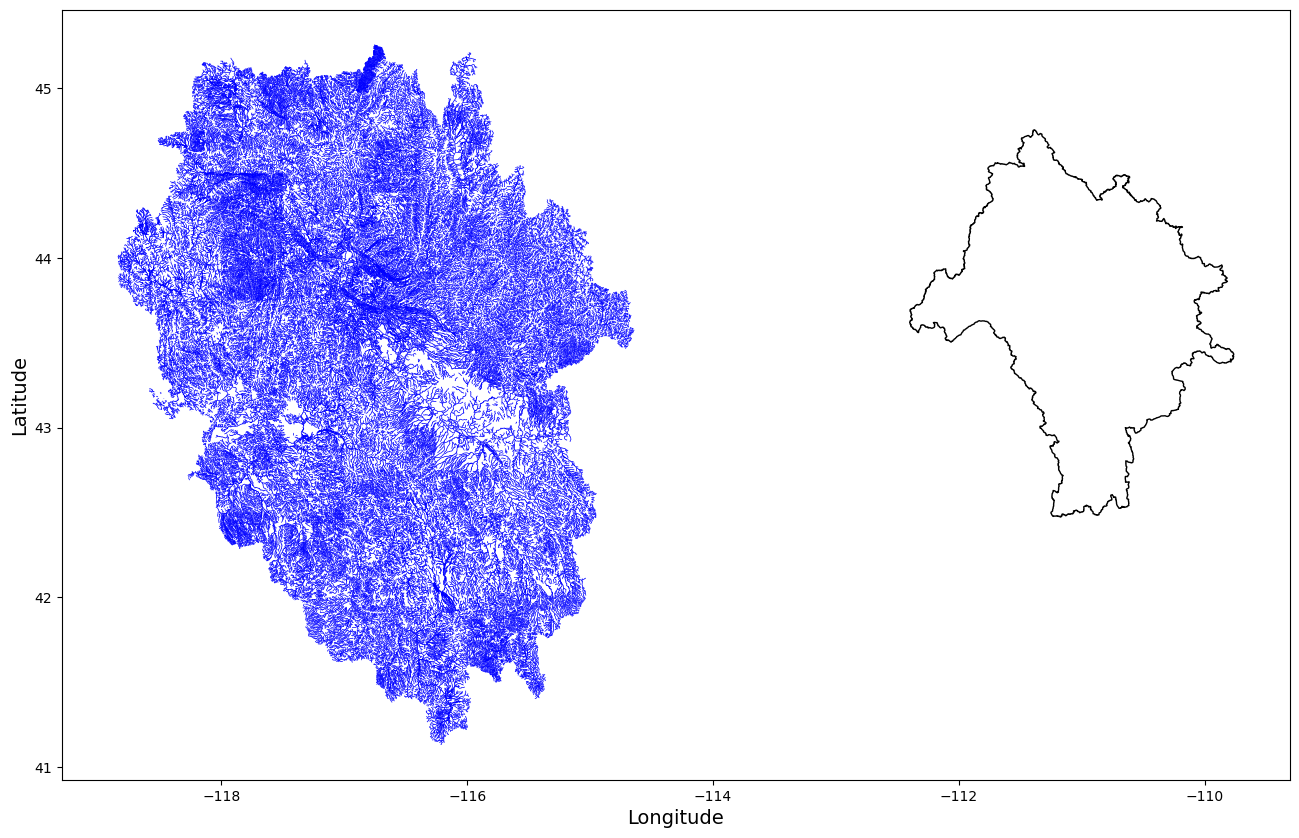

In [19]:
ws_gdf_bnd = ws_gdf.dissolve()

fig, ax = plt.subplots(figsize=(16,10))
nhd_gdf.plot(color='blue', linewidth=0.5, figsize=(16,10), ax=ax)
ws_gdf_bnd.plot(edgecolor='black', facecolor='none', ax=ax)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
plt.show()